In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# load data
t1 = time.time()
df = pd.read_csv('../input/human-activity-recognition/time_series_data_human_activities.csv')
t2 = time.time()
print('Elapsed time [s]:', np.round(t2-t1,4))

Elapsed time [s]: 1.2778


In [3]:
# structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073623 entries, 0 to 1073622
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1073623 non-null  int64  
 1   activity   1073623 non-null  object 
 2   timestamp  1073623 non-null  int64  
 3   x-axis     1073623 non-null  float64
 4   y-axis     1073623 non-null  float64
 5   z-axis     1073623 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.1+ MB


# Basic Explorations

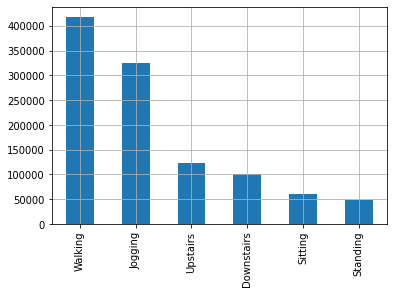

Walking       417901
Jogging       324600
Upstairs      122598
Downstairs    100192
Sitting        59939
Standing       48393
Name: activity, dtype: int64


In [4]:
# eval activities
activity_stats = df.activity.value_counts()
activities = activity_stats.index.tolist()
activity_stats.plot(kind='bar')
plt.grid()
plt.show()
print(activity_stats)

In [5]:
# activity vs. user
pd.crosstab(df.user, df.activity)

activity,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
user,,,,,,
1,2941,11056,0,0,3120,12861
2,0,11786,0,0,0,11739
3,3326,11018,1609,2824,3411,12970
4,1761,895,1257,0,1377,6079
5,3281,6405,1664,1515,3387,12257
6,1431,10961,1679,709,1661,12262
7,2257,9183,2529,2364,3601,11033
8,3345,10313,2699,3269,4453,17108
9,0,0,0,0,0,12923


# Look at specific user

In [6]:
# select user
sel_user = 3
df_user = df[df.user==sel_user]

# > Time Series Plots

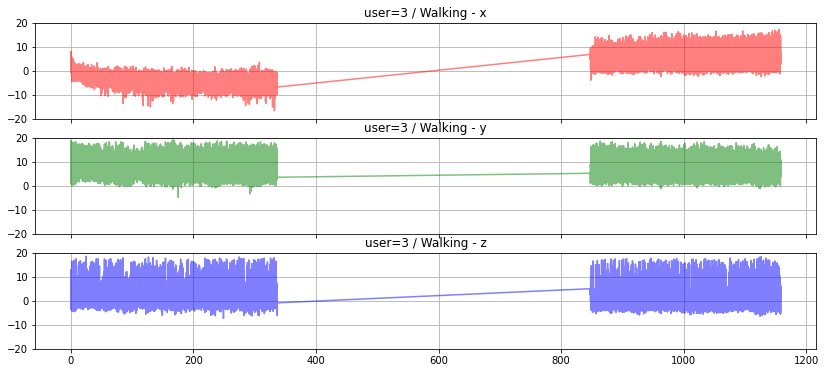

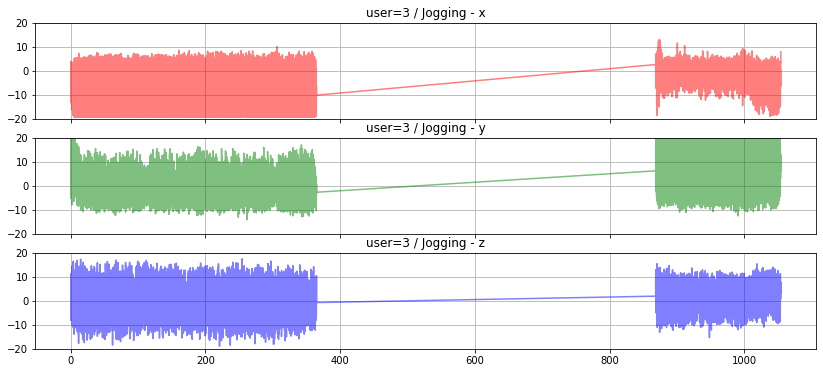

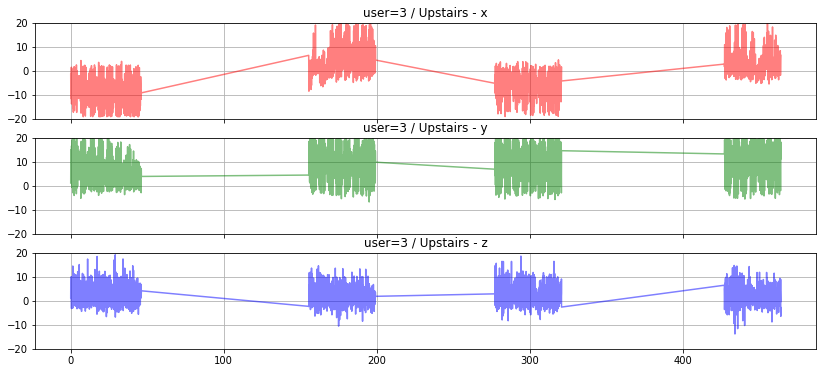

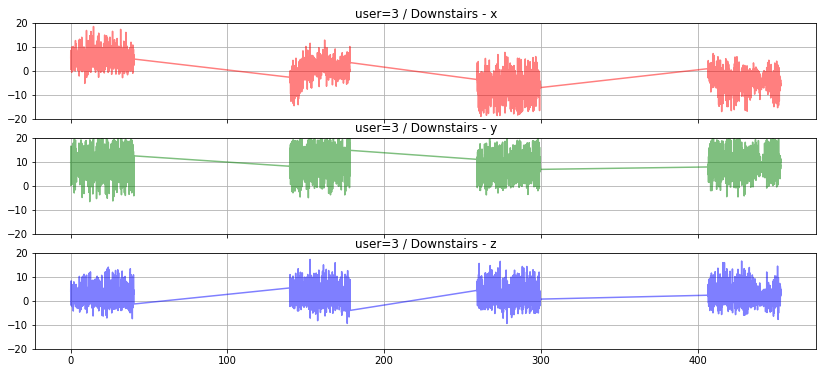

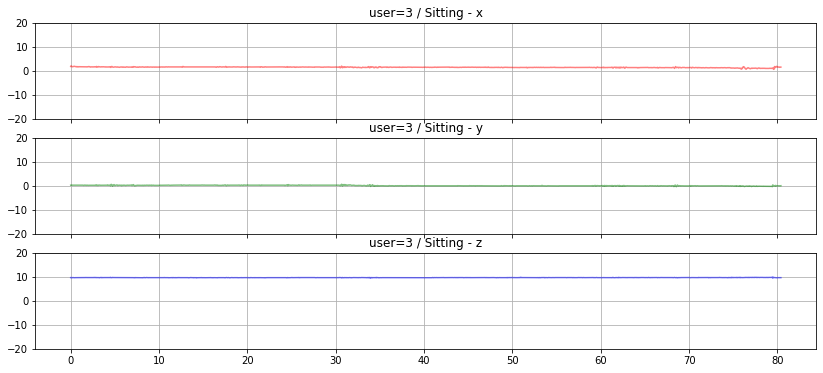

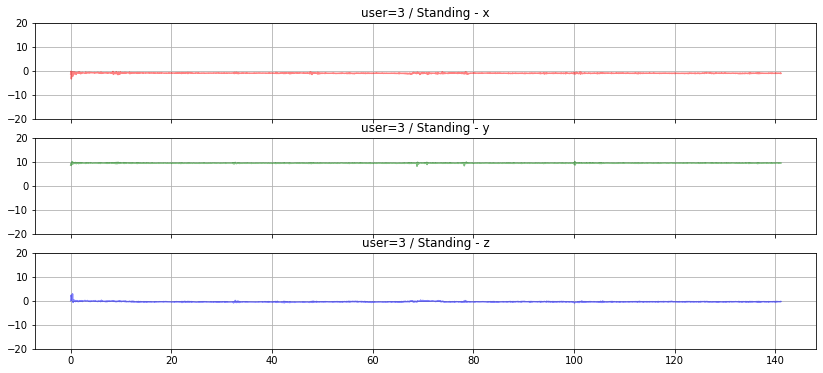

In [7]:
# time series plots
for act in activities:
    df_temp = df_user.loc[df.activity==act].copy()
    df_temp.reset_index(inplace=True)
    
    # convert time to seconds and start with 0
    t_min = df_temp.timestamp.min()
    df_temp['time_sec'] = (df_temp['timestamp'] - t_min)/1e9
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,6), sharex=True)
    
    ax1.plot(df_temp['time_sec'], df_temp['x-axis'], color='red', alpha=0.5)
    ax1.set_ylim(-20,20)
    ax1.set_title('user=' + str(sel_user) + ' / ' + act + ' - x')
    ax1.grid()
    
    ax2.plot(df_temp['time_sec'], df_temp['y-axis'], color='green', alpha=0.5)
    ax2.set_ylim(-20,20)
    ax2.set_title('user=' + str(sel_user) + ' / ' + act + ' - y')
    ax2.grid()

    ax3.plot(df_temp['time_sec'], df_temp['z-axis'], color='blue', alpha=0.5)
    ax3.set_ylim(-20,20)    
    ax3.set_title('user=' + str(sel_user) + ' / ' + act + ' - z')
    ax3.grid()
    
    plt.show()

# > Distribution Plots

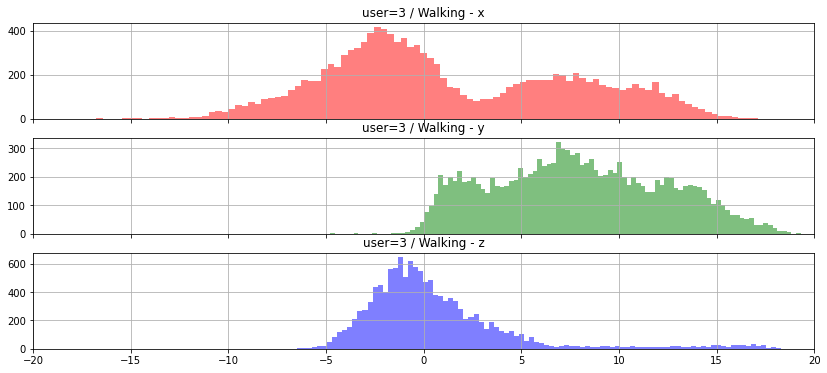

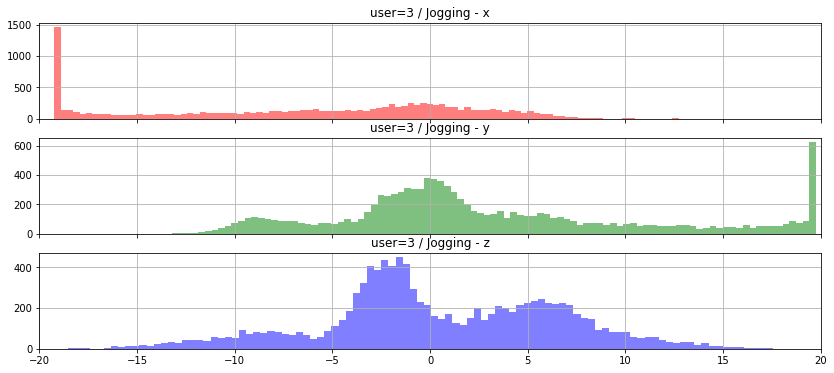

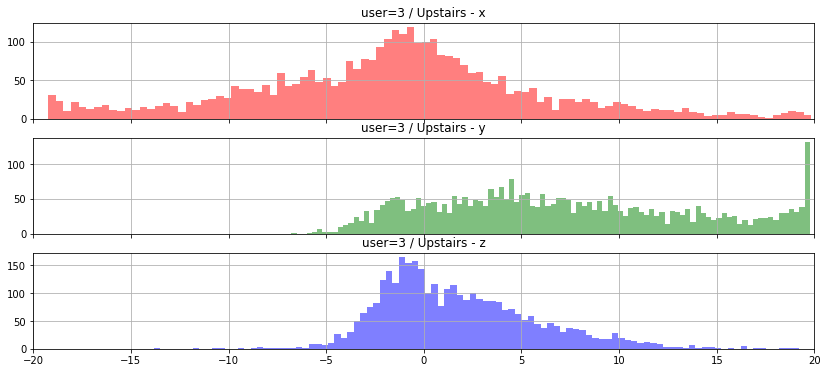

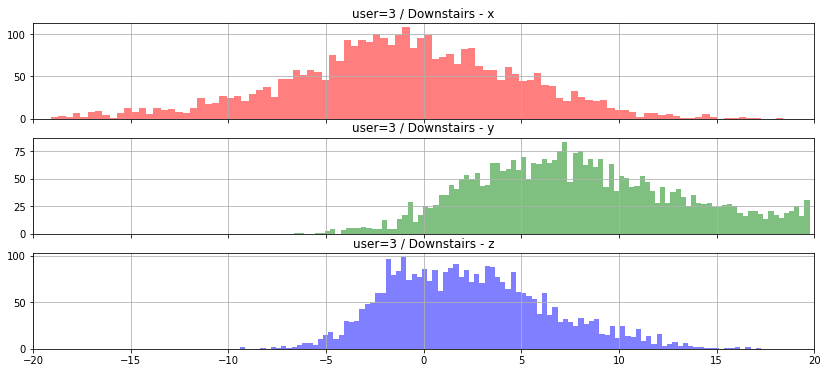

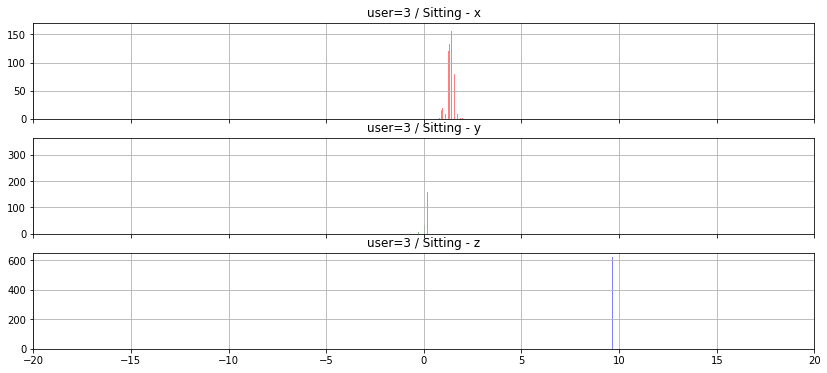

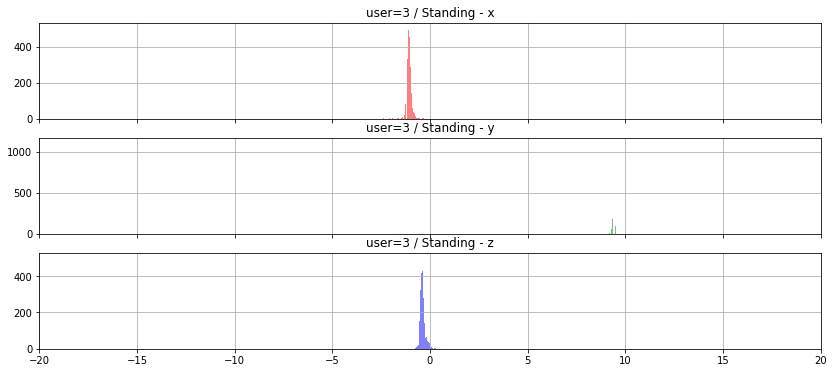

In [8]:
# distribution plots
n_bins = 100

for act in activities:
    df_temp = df_user.loc[df.activity==act].copy()
    df_temp.reset_index(inplace=True)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,6), sharex=True)
    
    ax1.hist(df_temp['x-axis'], bins=n_bins, color='red', alpha=0.5)
    ax1.set_xlim(-20,20)
    ax1.set_title('user=' + str(sel_user) + ' / ' + act + ' - x')
    ax1.grid()
    
    ax2.hist(df_temp['y-axis'], bins=n_bins, color='green', alpha=0.5)
    ax2.set_xlim(-20,20)
    ax2.set_title('user=' + str(sel_user) + ' / ' + act + ' - y')
    ax2.grid()

    ax3.hist(df_temp['z-axis'], bins=n_bins, color='blue', alpha=0.5)
    ax3.set_xlim(-20,20)
    ax3.set_title('user=' + str(sel_user) + ' / ' + act + ' - z')
    ax3.grid()
    
    plt.show()

# > Scatter Plots

Walking :


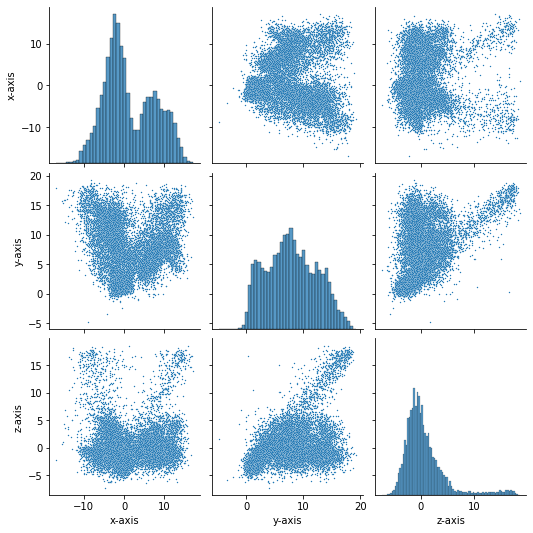

Jogging :


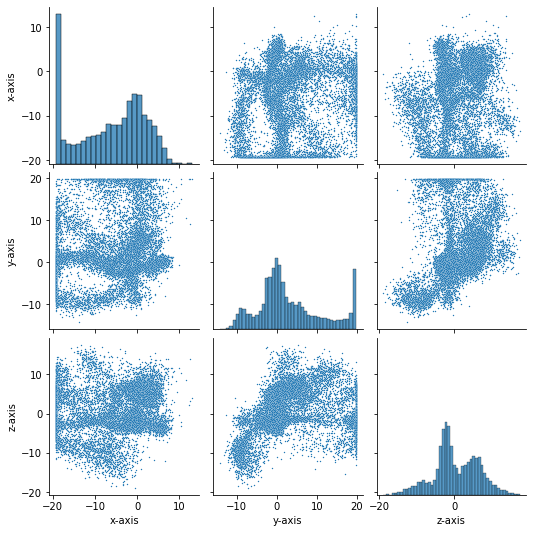

Upstairs :


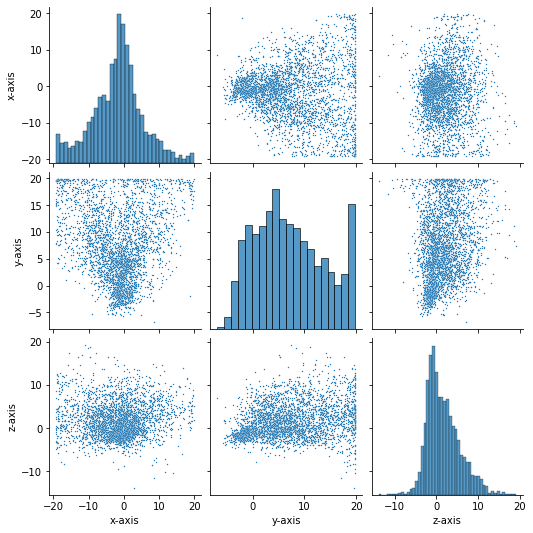

Downstairs :


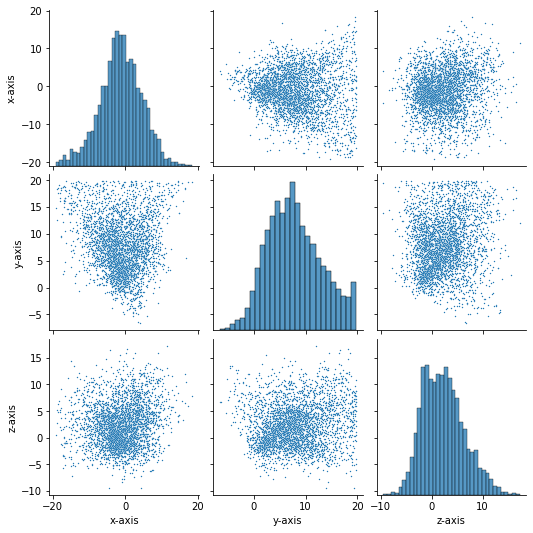

Sitting :


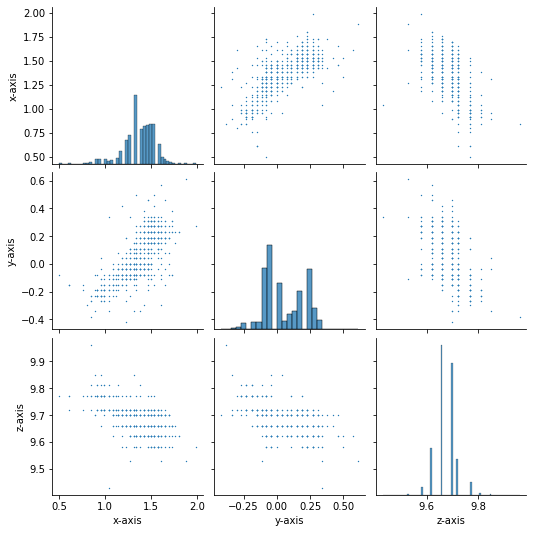

Standing :


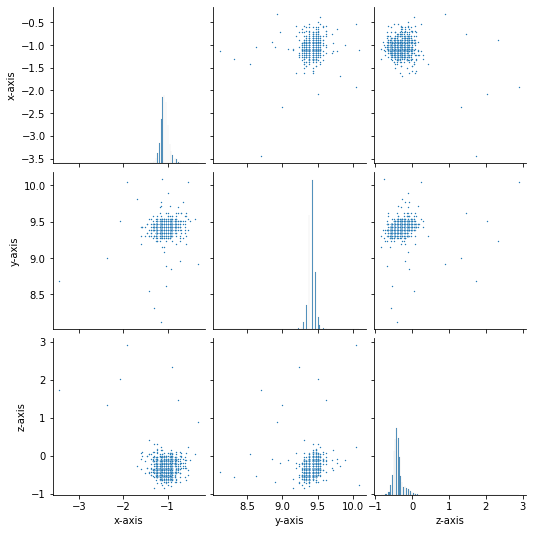

In [9]:
# pairwise scatter plots
for act in activities:
    df_temp = df_user.loc[df.activity==act].copy()
    df_temp.reset_index(inplace=True)
    
    # convert time to seconds and start with 0
    t_min = df_temp.timestamp.min()
    df_temp['time_sec'] = (df_temp['timestamp'] - t_min)/1e9
    
    print(act,':')
    sns.pairplot(data = df_temp[['x-axis','y-axis','z-axis']],
                 plot_kws = dict(s=2))
    plt.show()

# > Standard deviation of accelerations by activitiy

#### Note: We are still focussing on one selected user!

In [10]:
stats_by_act = df_user.groupby('activity')[['x-axis','y-axis','z-axis']].std()
stats_by_act

,x-axis,y-axis,z-axis
activity,,,
Downstairs,5.771033,5.208307,4.069624
Jogging,8.114999,7.966063,6.021514
Sitting,0.163183,0.149645,0.040073
Standing,0.125622,0.073809,0.175041
Upstairs,7.321590,6.639742,3.980631
Walking,6.186944,4.394928,3.907049


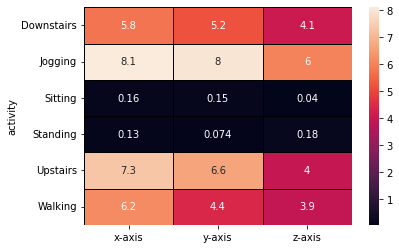

In [11]:
# and a more visual version
sns.heatmap(stats_by_act, annot=True, linewidths=1, linecolor='black')
plt.show()

# Back to all users

#### Evaluate standard deviation now by user and activity:

In [12]:
stats_full = df.groupby(['activity','user'], 
                        as_index=False)[['x-axis','y-axis','z-axis']].std()

In [13]:
# show full output
pd.set_option('display.max_rows', 200)
stats_full

,activity,user,x-axis,y-axis,z-axis
0,Downstairs,1,8.061251,4.761467,3.978546
1,Downstairs,3,5.771033,5.208307,4.069624
2,Downstairs,4,4.149014,3.826414,3.752217
3,Downstairs,5,3.119087,4.166938,2.693416
4,Downstairs,6,2.716701,3.754298,2.130593
5,Downstairs,7,5.157740,5.033377,2.810944
6,Downstairs,8,5.329682,4.501764,2.855786
7,Downstairs,10,3.576326,4.185330,4.212609
8,Downstairs,11,3.725861,9.745773,2.363278
9,Downstairs,12,3.813784,5.480537,4.657947


#### We can now visualize each (user,activity)-pair in a 3D scatter plot:

In [14]:
# interactive 3d scatter plot
fig = px.scatter_3d(data_frame=stats_full,
                    x='x-axis', y='y-axis', z='z-axis',
                    color='activity',
                    opacity=0.25)
fig.update_layout(title='')
fig.show()

#### Finally, let's evaluate the mean (across users) of the standard deviations by activity:

In [15]:
stats_full_mean_std = stats_full.groupby('activity')[['x-axis','y-axis','z-axis']].mean()
stats_full_mean_std

,x-axis,y-axis,z-axis
activity,,,
Downstairs,4.264054,4.541456,3.240970
Jogging,8.044195,8.374622,5.585056
Sitting,0.315291,0.284248,0.288881
Standing,0.496411,0.294802,0.499241
Upstairs,4.200767,4.314794,3.116068
Walking,4.603113,4.515043,3.718029


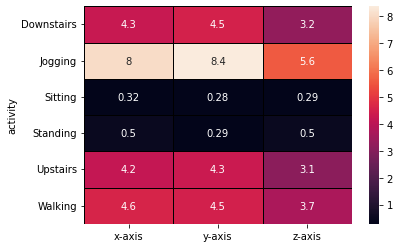

In [16]:
# and again a more visual version
sns.heatmap(stats_full_mean_std,
            annot=True, linewidths=1, linecolor='black')
plt.show()